In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

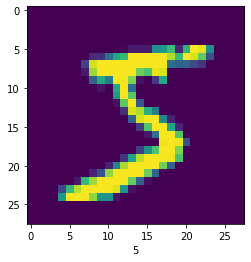

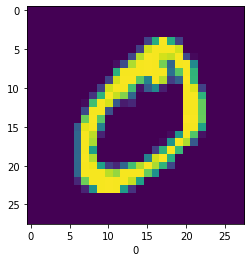

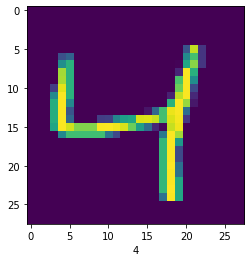

In [5]:
for i in range(3):
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
    plt.show()

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(28, activation='relu', ),
    keras.layers.Dense(10, activation='sigmoid', )
])

In [10]:
cnn.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [11]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.2060 - accuracy: 0.9373
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0667 - accuracy: 0.9795
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0492 - accuracy: 0.9848
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0399 - accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0323 - accuracy: 0.9896


In [12]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.0326 - accuracy: 0.9897


[0.03259912133216858, 0.9897000193595886]

In [13]:
y_pred = cnn.predict(X_test)

In [14]:
y_pred[0]

array([2.3899543e-01, 1.3257116e-02, 5.0154167e-01, 9.8527539e-01,
       1.0669827e-03, 1.9175917e-02, 4.6803680e-06, 9.9999404e-01,
       5.6493551e-02, 8.6010957e-01], dtype=float32)

In [15]:
y_pred_class = [np.argmax(i) for i in y_pred]

In [16]:
y_pred_class[0]

7

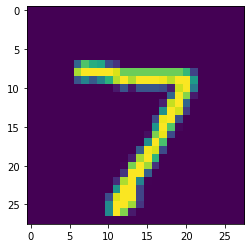

In [17]:
plt.imshow(X_test[0])
plt.show()

In [18]:
dict1 = {'y_actual': y_test, 'y_predicted': y_pred_class}
df = pd.DataFrame(dict1)
df.sample(5)

,y_actual,y_predicted
5071,7,7
4957,0,0
4886,7,7
6647,4,4
2284,3,3


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [21]:
cm = confusion_matrix(y_test, y_pred_class)

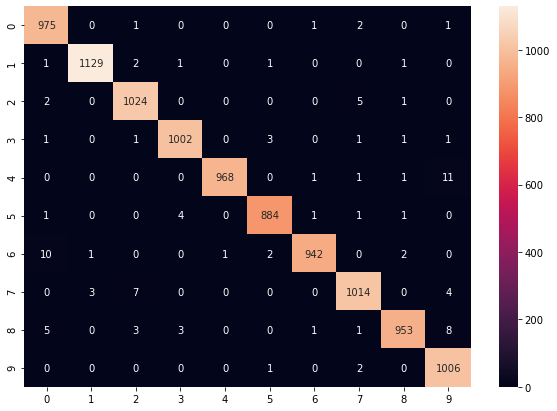

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()